<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Twitter Sentiment Analysis System</b></div>

<div style="width:100%;text-align:center"> 
<img align=middle src = "https://ichef.bbci.co.uk/news/976/cpsprodpb/13B2F/production/_127678608_gettyimages-1244636244.jpg" width="500px">
</div>

<a id="Introduction"></a>
# Introduction
-  The main aim of this project is to explain the task of Sentiment Analysis System using Bag of Words and TFIDF Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        positive         
        neutral             
        negative          
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Georgia;text-align:center;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Step by Step Implementation</b></div>

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:10px;background-color:#254E58;overflow:hidden"><b> Import Required Libraries</b></div>

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'prettytable'

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Read The Dataset</b></div>

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

In [25]:
''' 
    /*-------------------- LOAD_dataset ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
dataset = pd.read_csv('Master_DataSet.csv')
dataset = pd.DataFrame(dataset)
#Load the Training Data
print("Complete Data:")
print("=============\n")
dataset

Complete Data:



Blue_Verified            Account_Created  \
0               False  2011-12-08 17:20:27+00:00   
1               False  2021-10-20 22:23:03+00:00   
2               False  2015-01-20 02:00:00+00:00   
3               False  2009-11-03 01:34:20+00:00   
4               False  2011-12-08 17:20:27+00:00   
...               ...                        ...   
361061          False  2017-09-12 21:58:39+00:00   
361062          False  2019-08-25 12:33:49+00:00   
361063          False  2008-12-03 15:55:20+00:00   
361064          False  2017-09-27 13:56:14+00:00   
361065          False  2019-09-07 11:06:33+00:00   

                                                 User_Bio  \
0       Scientific Advisor at Broad Institute of MIT &...   
1                   The View should be renamed the Shrews   
2                                                     NaN   
3       labor organizer @AlphabetWorkers. previously @...   
4       Scientific Advisor at Broad Institute of MIT &...   
...                                                   ...   
361061                   Artiste. https://t.co/SarKe4UjYt   
361062  Chemist, photographer, Hong Konger. \n\n#HKInd...   
361063  Former executive director of Human Rights Watc...   
361064  Cyber Psychologist,#BigData Scientist,#Entrepr...   
361065  The Independence of Hong Kong is the only way....   

                       Attached_URL  Favourites_Count  Followers_Count  \
0                               NaN             14414            71541   
1                               NaN              1230               77   
2                               NaN               162               45   
3                               NaN             51350             1399   
4                               NaN             14414            71541   
...                             ...               ...              ...   
361061                          NaN            137950             8520   
361062                          NaN            239457             2732   
361063                          NaN                 7           600521   
361064  twitter.com/search?q=from%…             20715             1198   
361065                   hkrev.info              6409              846   

        Friends_Count  Listed_Count        User_Location  Media_Count  ...  \
0                 577           894        Cambridge, MA         2260  ...   
1                 193             0                  NaN            1  ...   
2                 214             0                  NaN           28  ...   
3                1183            21                   NC          163  ...   
4                 577           894        Cambridge, MA         2260  ...   
...               ...           ...                  ...          ...  ...   
361061           2228            36       In God's Hands           25  ...   
361062            599             5            Hong Kong         2398  ...   
361063           1159          5335  New York and Geneva        50374  ...   
361064           3230            14                  NaN         1721  ...   
361065           2407             2                  NaN           14  ...   

                                            Tweet_Content Tweet_Language  \
0       These questions about what wildlife exactly wa...             en   
1       I thought with COVID was the foundation that b...             en   
2       @PeterCBC Peter can you please put some hard q...             en   
3       between mass shootings, COVID, and wildfires, ...             en   
4       Lab leak proponents have been advocating endle...             en   
...                                                   ...            ...   
361061  The Chinese government's attempt to cover up S...             en   
361062  38 suspected #WuHanPneumonia in Hong Kong toda...             en   
361063  The Chinese government's attempt to cover up S...             en   
361064  @charlesmok @SolomonYue Worse than it seems-bi...       

In [28]:
dataset = dataset[['Blue_Verified', 'Tweet_Content','Tweet_DateTime','User_Location']]
dataset = dataset.head(50000)
dataset

Blue_Verified                                      Tweet_Content  \
0              False  These questions about what wildlife exactly wa...   
1              False  I thought with COVID was the foundation that b...   
2              False  @PeterCBC Peter can you please put some hard q...   
3              False  between mass shootings, COVID, and wildfires, ...   
4              False  Lab leak proponents have been advocating endle...   
...              ...                                                ...   
49995          False  @sarulez86 @vanheerr @justinspratt Lockdown, j...   
49996          False  Yesterday I watched a video from Italy where 3...   
49997          False  @mattletiss7 Thanks for giving people hope tha...   
49998          False  @ColfordTracey @EbbySon @theysayitsrare @r1chd...   
49999          False  Covid virus is an indicator of HEALTH. If one ...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:27:02+00:00                  NaN  
2      2021-12-31 01:26:22+00:00                  NaN  
3      2021-12-31 01:26:13+00:00                   NC  
4      2021-12-31 01:26:02+00:00        Cambridge, MA  
...                          ...                  ...  
49995  2021-12-19 19:09:11+00:00         South-Africa  
49996  2021-12-19 19:08:52+00:00                  NaN  
49997  2021-12-19 19:08:38+00:00  Nottingham, England  
49998  2021-12-19 19:07:52+00:00                  NaN  
49999  2021-12-19 19:07:45+00:00                  NaN  

[50000 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding (Before Data Preprocessing)</b></div>

In [29]:
print(f'The shape of the dataset is : {dataset.shape}')

The shape of the dataset is : (50000, 4)


In [30]:
print(f'The columns are :{dataset.columns}')

The columns are :Index(['Blue_Verified', 'Tweet_Content', 'Tweet_DateTime', 'User_Location'], dtype='object')


In [31]:
print(f'The dtypes of the dataset : \n\n{dataset.dtypes}')

The dtypes of the dataset : 

Blue_Verified       bool
Tweet_Content     object
Tweet_DateTime    object
User_Location     object
dtype: object


<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:15px ; color:#034914">

**Tweet_Content**<br>
* In a quick review we can observe basic information <br>
* But we are going to create a function to show of more details such as<br>
Volume of null values and its percentage , Volume of duplicated and percentage of duplicated values

</div>

In [32]:
dataset.describe(include='all')

Blue_Verified                                      Tweet_Content  \
count          50000                                              50000   
unique             2                                              49664   
top            False  Morning one and all Remember Covid is airborne...   
freq           45948                                                 11   

                   Tweet_DateTime  User_Location  
count                       50000          34323  
unique                      48196          12893  
top     2021-12-20 08:27:26+00:00  United States  
freq                            9            792

In [33]:
def show_details(dataset):
    missed_values = dataset.isnull().sum()
    missed_values_percent = (dataset.isnull().sum()) / len(dataset)
    duplicated_values = dataset.duplicated().sum()
    duplicated_values_percent = (dataset.duplicated().sum()) / len(dataset)
    info_frame = pd.DataFrame({'Missed_Values' : missed_values , 
                              'Missed_Values %' :missed_values_percent,
                              'Duplicated values' :duplicated_values,
                              'Duplicated values %':duplicated_values_percent})
    return info_frame.T

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px ; color:#034914">

**Tweet_Content**<br>
* We can see that very small number of data are missed and duplicated which can easily be dropped.

</div>

In [34]:
show_details(dataset)

Blue_Verified  Tweet_Content  Tweet_DateTime  \
Missed_Values              0.00000        0.00000         0.00000   
Missed_Values %            0.00000        0.00000         0.00000   
Duplicated values          1.00000        1.00000         1.00000   
Duplicated values %        0.00002        0.00002         0.00002   

                     User_Location  
Missed_Values          15677.00000  
Missed_Values %            0.31354  
Duplicated values          1.00000  
Duplicated values %        0.00002

In [35]:
dataset

Blue_Verified                                      Tweet_Content  \
0              False  These questions about what wildlife exactly wa...   
1              False  I thought with COVID was the foundation that b...   
2              False  @PeterCBC Peter can you please put some hard q...   
3              False  between mass shootings, COVID, and wildfires, ...   
4              False  Lab leak proponents have been advocating endle...   
...              ...                                                ...   
49995          False  @sarulez86 @vanheerr @justinspratt Lockdown, j...   
49996          False  Yesterday I watched a video from Italy where 3...   
49997          False  @mattletiss7 Thanks for giving people hope tha...   
49998          False  @ColfordTracey @EbbySon @theysayitsrare @r1chd...   
49999          False  Covid virus is an indicator of HEALTH. If one ...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:27:02+00:00                  NaN  
2      2021-12-31 01:26:22+00:00                  NaN  
3      2021-12-31 01:26:13+00:00                   NC  
4      2021-12-31 01:26:02+00:00        Cambridge, MA  
...                          ...                  ...  
49995  2021-12-19 19:09:11+00:00         South-Africa  
49996  2021-12-19 19:08:52+00:00                  NaN  
49997  2021-12-19 19:08:38+00:00  Nottingham, England  
49998  2021-12-19 19:07:52+00:00                  NaN  
49999  2021-12-19 19:07:45+00:00                  NaN  

[50000 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Preprocessing</b></div>

## Remove Duplicate, Null, and Missing Values

In [36]:
dataset.drop_duplicates(inplace=True)
dataset.dropna(inplace=True)
show_details(dataset)

Blue_Verified  Tweet_Content  Tweet_DateTime  \
Missed_Values                  0.0            0.0             0.0   
Missed_Values %                0.0            0.0             0.0   
Duplicated values              0.0            0.0             0.0   
Duplicated values %            0.0            0.0             0.0   

                     User_Location  
Missed_Values                  0.0  
Missed_Values %                0.0  
Duplicated values              0.0  
Duplicated values %            0.0

In [37]:
# Reset the index of the merged DataFrame
dataset.reset_index(drop=True, inplace=True)
dataset

Blue_Verified                                      Tweet_Content  \
0              False  These questions about what wildlife exactly wa...   
1              False  between mass shootings, COVID, and wildfires, ...   
2              False  Lab leak proponents have been advocating endle...   
3              False  @joshtpm @TwitterSupport is allowing its platf...   
4              False  @AnthonyDaleOHA The only people dying are thos...   
...              ...                                                ...   
34317          False  @MrEko2001 @Chancer1979 @Jamesblacky87 @mattle...   
34318          False  Ottawa Public Health is urging all residents w...   
34319          False  this pandemic shit would’ve been under control...   
34320          False  @sarulez86 @vanheerr @justinspratt Lockdown, j...   
34321          False  @mattletiss7 Thanks for giving people hope tha...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:26:13+00:00                   NC  
2      2021-12-31 01:26:02+00:00        Cambridge, MA  
3      2021-12-31 01:25:20+00:00      Paradise Island  
4      2021-12-31 01:25:19+00:00      Ottawa, Ontario  
...                          ...                  ...  
34317  2021-12-19 19:11:29+00:00       United Kingdom  
34318  2021-12-19 19:11:09+00:00      Ottawa, Ontario  
34319  2021-12-19 19:09:47+00:00          Chicago, IL  
34320  2021-12-19 19:09:11+00:00         South-Africa  
34321  2021-12-19 19:08:38+00:00  Nottingham, England  

[34322 rows x 4 columns]

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

We used RegEx for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [38]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/apple/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [39]:

''' 
    /*------------------------PRE-PROCESSING--DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


import re
import string
from nltk.corpus import stopwords

def data_preprocessing(text):
    # Check if 'text' is a string
    if not isinstance(text, str):
        return ""  # Return an empty string if 'text' is not a string

    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)


    # Regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # Convert the text to lower case
    text = text.lower()
    
    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)
        # Remove extra whitespaces after removing single characters
        
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Remove words with less than 3 characters
    text = ' '.join(word for word in text.split() if len(word) >= 3)
    
    # Remove all English Stopwords
    stop_words = stopwords.words('english')
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

    return text


In [40]:
# Apply the Preprocessing on Input Data Comments of Training Data
dataset['Tweet_Content'] = dataset['Tweet_Content'].apply(data_preprocessing)

print("\nTraining Data After Pre-processing:")
print("====================================\n")
dataset


Training Data After Pre-processing:



Blue_Verified                                      Tweet_Content  \
0              False  questions wildlife exactly sold huanan market ...   
1              False  mass shootings covid wildfires people colorado...   
2              False  lab leak proponents advocating endlessly acces...   
3              False  allowing platform used verified account amplif...   
4              False  people dying suffering mental health issues lo...   
...              ...                                                ...   
34317          False  digital wallet covid passport health passport ...   
34318          False  ottawa public health urging residents covid sy...   
34319          False  pandemic shit would control thought effective ...   
34320          False  lockdown jabs masks contain covid virus logic ...   
34321          False  thanks giving people hope people public eye st...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:26:13+00:00                   NC  
2      2021-12-31 01:26:02+00:00        Cambridge, MA  
3      2021-12-31 01:25:20+00:00      Paradise Island  
4      2021-12-31 01:25:19+00:00      Ottawa, Ontario  
...                          ...                  ...  
34317  2021-12-19 19:11:29+00:00       United Kingdom  
34318  2021-12-19 19:11:09+00:00      Ottawa, Ontario  
34319  2021-12-19 19:09:47+00:00          Chicago, IL  
34320  2021-12-19 19:09:11+00:00         South-Africa  
34321  2021-12-19 19:08:38+00:00  Nottingham, England  

[34322 rows x 4 columns]

In [41]:
dataset

Blue_Verified                                      Tweet_Content  \
0              False  questions wildlife exactly sold huanan market ...   
1              False  mass shootings covid wildfires people colorado...   
2              False  lab leak proponents advocating endlessly acces...   
3              False  allowing platform used verified account amplif...   
4              False  people dying suffering mental health issues lo...   
...              ...                                                ...   
34317          False  digital wallet covid passport health passport ...   
34318          False  ottawa public health urging residents covid sy...   
34319          False  pandemic shit would control thought effective ...   
34320          False  lockdown jabs masks contain covid virus logic ...   
34321          False  thanks giving people hope people public eye st...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:26:13+00:00                   NC  
2      2021-12-31 01:26:02+00:00        Cambridge, MA  
3      2021-12-31 01:25:20+00:00      Paradise Island  
4      2021-12-31 01:25:19+00:00      Ottawa, Ontario  
...                          ...                  ...  
34317  2021-12-19 19:11:29+00:00       United Kingdom  
34318  2021-12-19 19:11:09+00:00      Ottawa, Ontario  
34319  2021-12-19 19:09:47+00:00          Chicago, IL  
34320  2021-12-19 19:09:11+00:00         South-Africa  
34321  2021-12-19 19:08:38+00:00  Nottingham, England  

[34322 rows x 4 columns]

In [42]:
def filter_Tweet_Contents_by_word_count(dataset, min_words=3):
    # Count the number of words in each entry of the 'Tweet_Content' column
    dataset['Num_Words'] = dataset['Tweet_Content'].apply(lambda x: len(str(x).split()))
    
    # Filter the DataFrame to keep only rows with at least min_words words
    filtered_dataset = dataset[dataset['Num_Words'] >= min_words].copy()
    
    # Drop the temporary 'Num_Words' column
    filtered_dataset = filtered_dataset.drop(columns=['Num_Words'])
    
    return filtered_dataset

dataset = filter_Tweet_Contents_by_word_count(dataset)

# Display the resulting DataFrame
print("Dataset Data:")
print("=======================\n")
dataset.head()

Dataset Data:



Blue_Verified                                      Tweet_Content  \
0          False  questions wildlife exactly sold huanan market ...   
1          False  mass shootings covid wildfires people colorado...   
2          False  lab leak proponents advocating endlessly acces...   
3          False  allowing platform used verified account amplif...   
4          False  people dying suffering mental health issues lo...   

              Tweet_DateTime    User_Location  
0  2021-12-31 01:27:19+00:00    Cambridge, MA  
1  2021-12-31 01:26:13+00:00               NC  
2  2021-12-31 01:26:02+00:00    Cambridge, MA  
3  2021-12-31 01:25:20+00:00  Paradise Island  
4  2021-12-31 01:25:19+00:00  Ottawa, Ontario

In [43]:
dataset.reset_index(drop=True)
dataset

Blue_Verified                                      Tweet_Content  \
0              False  questions wildlife exactly sold huanan market ...   
1              False  mass shootings covid wildfires people colorado...   
2              False  lab leak proponents advocating endlessly acces...   
3              False  allowing platform used verified account amplif...   
4              False  people dying suffering mental health issues lo...   
...              ...                                                ...   
34317          False  digital wallet covid passport health passport ...   
34318          False  ottawa public health urging residents covid sy...   
34319          False  pandemic shit would control thought effective ...   
34320          False  lockdown jabs masks contain covid virus logic ...   
34321          False  thanks giving people hope people public eye st...   

                  Tweet_DateTime        User_Location  
0      2021-12-31 01:27:19+00:00        Cambridge, MA  
1      2021-12-31 01:26:13+00:00                   NC  
2      2021-12-31 01:26:02+00:00        Cambridge, MA  
3      2021-12-31 01:25:20+00:00      Paradise Island  
4      2021-12-31 01:25:19+00:00      Ottawa, Ontario  
...                          ...                  ...  
34317  2021-12-19 19:11:29+00:00       United Kingdom  
34318  2021-12-19 19:11:09+00:00      Ottawa, Ontario  
34319  2021-12-19 19:09:47+00:00          Chicago, IL  
34320  2021-12-19 19:09:11+00:00         South-Africa  
34321  2021-12-19 19:08:38+00:00  Nottingham, England  

[34275 rows x 4 columns]

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Sentiment Analysis using VADER</b></div>

## Objective
The model utilizes the VADER architecture and is trained on a dataset of user comments with sentiment labels.

The model is capable of analyzing comments and extracting sentiments such as positive, negative, or neutral.

## Features
Sentiment Classification: The model can classify user comments into positive, negative, or neutral sentiments, providing an overall indication of the expressed opinion.

In [44]:
pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [45]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()
# Function to assign sentiment labels
def get_sentiment_label(sentiment_score):
    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply VADER sentiment analysis and add labels to the DataFrame
dataset['Sentiment_score'] = dataset['Tweet_Content'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
dataset['Sentiment'] = dataset['Sentiment_score'].apply(get_sentiment_label)

In [46]:
dataset

Blue_Verified                                      Tweet_Content  \
0              False  questions wildlife exactly sold huanan market ...   
1              False  mass shootings covid wildfires people colorado...   
2              False  lab leak proponents advocating endlessly acces...   
3              False  allowing platform used verified account amplif...   
4              False  people dying suffering mental health issues lo...   
...              ...                                                ...   
34317          False  digital wallet covid passport health passport ...   
34318          False  ottawa public health urging residents covid sy...   
34319          False  pandemic shit would control thought effective ...   
34320          False  lockdown jabs masks contain covid virus logic ...   
34321          False  thanks giving people hope people public eye st...   

                  Tweet_DateTime        User_Location  Sentiment_score  \
0      2021-12-31 01:27:19+00:00        Cambridge, MA           0.0000   
1      2021-12-31 01:26:13+00:00                   NC           0.2732   
2      2021-12-31 01:26:02+00:00        Cambridge, MA          -0.3400   
3      2021-12-31 01:25:20+00:00      Paradise Island          -0.7269   
4      2021-12-31 01:25:19+00:00      Ottawa, Ontario          -0.7096   
...                          ...                  ...              ...   
34317  2021-12-19 19:11:29+00:00       United Kingdom          -0.2960   
34318  2021-12-19 19:11:09+00:00      Ottawa, Ontario           0.0000   
34319  2021-12-19 19:09:47+00:00          Chicago, IL           0.7096   
34320  2021-12-19 19:09:11+00:00         South-Africa          -0.2960   
34321  2021-12-19 19:08:38+00:00  Nottingham, England           0.4767   

      Sentiment  
0       Neutral  
1      Positive  
2      Negative  
3      Negative  
4      Negative  
...         ...  
34317  Negative  
34318   Neutral  
34319  Positive  
34320  Negative  
34321  Positive  

[34275 rows x 6 columns]

In [47]:
# Save DataFrame to CSV
dataset.to_csv('tweets_sentiment.csv', index=False)

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Dataset Understanding and Exploratory Data Analysis(After Data Preprocessing)</b></div>

In [48]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(dataset.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_dataset_instances= len(dataset.index)
print("Total Train Data instances:",total_dataset_instances)



Attributes Names in Train Dataset:

Index(['Blue_Verified', 'Tweet_Content', 'Tweet_DateTime', 'User_Location',
       'Sentiment_score', 'Sentiment'],
      dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 34275


In [49]:
dataset.describe()

Sentiment_score
count     34275.000000
mean         -0.003562
std           0.518881
min          -0.994200
25%          -0.440400
50%           0.000000
75%           0.421500
max           0.988000

In [50]:
print('The Count of sentiments in the dataset : \n')
Sentiment =dataset.Sentiment.value_counts()
Sentiment.to_frame().T

The Count of sentiments in the dataset : 



Sentiment  Positive  Negative  Neutral
count         15167     14646     4462

In [51]:
print(f'The unique values of Sentiments : {len(dataset.Sentiment.unique())}')
print('**' * 20)
print(dataset.Sentiment.unique())

The unique values of Sentiments : 3
****************************************
['Neutral' 'Positive' 'Negative']



Number of instances and Classes in Training Dataset:



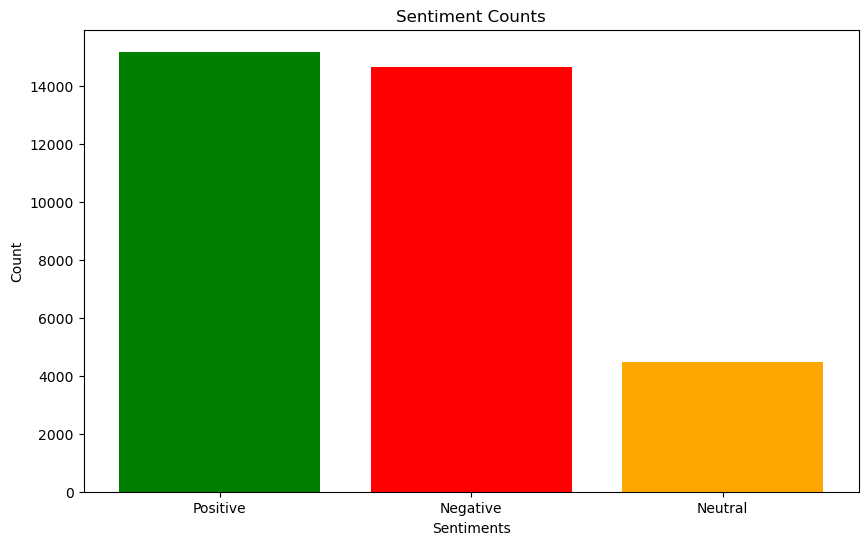

In [52]:
import matplotlib.pyplot as plt

print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")

# Assuming sentiment_counts is a Pandas Series containing sentiment counts
sentiment_counts = dataset['Sentiment'].value_counts()

# Set the figure size
plt.figure(figsize=(10, 6))

# Define a color for each sentiment
colors = {'Positive': 'green', 'Neutral': 'orange', 'Negative': 'red'}

# Create a bar graph with colored bars
plt.bar(sentiment_counts.index, sentiment_counts.values, color=[colors[sent] for sent in sentiment_counts.index])

# Add labels and a title
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.title('Sentiment Counts')

# Show the bar graph
plt.show()


In [53]:
import plotly.graph_objects as go

sentiment_counts = dataset['Sentiment'].value_counts().sort_index()

sentiment_labels = ['Negative', 'Neutral', 'Positive']
sentiment_colors = ['red', 'grey', 'green']


fig = go.Figure(data=[go.Pie(labels=sentiment_counts.index, 
                             values=sentiment_counts.values,
                             textinfo='percent+value+label',
                             marker_colors=sentiment_colors,
                             textposition='auto',
                             hole=.3)])

fig.update_layout(
    title_text='Sentiment Distribution',
    template='plotly_white',
    xaxis=dict(
        title='Sources',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    yaxis=dict(
        title='Number of Posts in Twitter',
        title_standoff=15,  # Adjust the distance of the title from the axis
    ),
    title_x=0.5,  # Center the title
    title_y=0.95,  # Adjust the vertical position of the title
)

fig.update_traces(marker_line_color='black', 
                  marker_line_width=1.5, 
                  opacity=0.8)
 
fig.show()


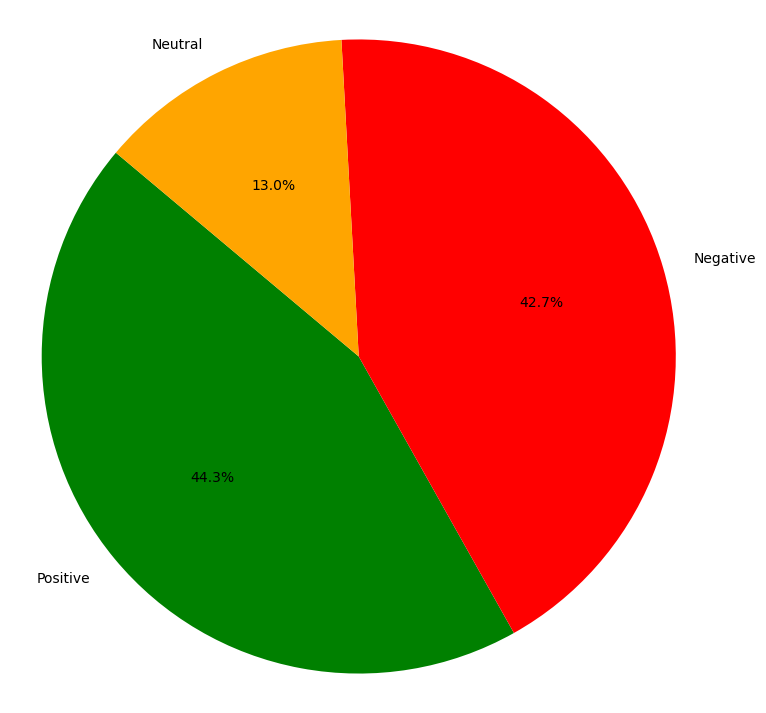

In [54]:
sentiment_counts = dataset['Sentiment'].value_counts()

# Define colors for each sentiment
colors = {'Negative': 'red', 'Positive': 'green', 'Neutral': 'orange'}

# Create a pie chart with custom colors
plt.figure(figsize=(9, 9))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors[s] for s in sentiment_counts.index])
# plt.title("Sentiment Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the pie chart
plt.show()

In [55]:
# Convert 'Tweet_Content_DateTime' column to datetime format
dataset['Tweet_DateTime'] = pd.to_datetime(dataset['Tweet_DateTime'])

# Extract only the date part
dataset['Tweet_DateTime'] = dataset['Tweet_DateTime'].dt.date
dataset

Blue_Verified                                      Tweet_Content  \
0              False  questions wildlife exactly sold huanan market ...   
1              False  mass shootings covid wildfires people colorado...   
2              False  lab leak proponents advocating endlessly acces...   
3              False  allowing platform used verified account amplif...   
4              False  people dying suffering mental health issues lo...   
...              ...                                                ...   
34317          False  digital wallet covid passport health passport ...   
34318          False  ottawa public health urging residents covid sy...   
34319          False  pandemic shit would control thought effective ...   
34320          False  lockdown jabs masks contain covid virus logic ...   
34321          False  thanks giving people hope people public eye st...   

      Tweet_DateTime        User_Location  Sentiment_score Sentiment  
0         2021-12-31        Cambridge, MA           0.0000   Neutral  
1         2021-12-31                   NC           0.2732  Positive  
2         2021-12-31        Cambridge, MA          -0.3400  Negative  
3         2021-12-31      Paradise Island          -0.7269  Negative  
4         2021-12-31      Ottawa, Ontario          -0.7096  Negative  
...              ...                  ...              ...       ...  
34317     2021-12-19       United Kingdom          -0.2960  Negative  
34318     2021-12-19      Ottawa, Ontario           0.0000   Neutral  
34319     2021-12-19          Chicago, IL           0.7096  Positive  
34320     2021-12-19         South-Africa          -0.2960  Negative  
34321     2021-12-19  Nottingham, England           0.4767  Positive  

[34275 rows x 6 columns]

In [56]:
# Replace 'df' with the name of your DataFrame
dataset.to_csv('tweets_sentiment_data.csv', index=False)

## Shape of the Training Data

In [57]:
dataset.shape

(34275, 6)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [58]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
preprocessed_dataset = dataset
Tokens = preprocessed_dataset['Tweet_Content'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_dataset["Sentiment"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_dataset['Tweet_Content'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



Tweet_Content Sentiment  \
0  [questions, wildlife, exactly, sold, huanan, m...   Neutral   
1  [mass, shootings, covid, wildfires, people, co...  Positive   
2  [lab, leak, proponents, advocating, endlessly,...  Negative   

                                        Token_Length  
0  [9, 8, 7, 4, 6, 6, 4, 11, 4, 5, 5, 7, 8, 10, 4...  
1  [4, 9, 5, 9, 6, 8, 11, 4, 6, 4, 5, 4, 5, 5, 4,...  
2  [3, 4, 10, 10, 9, 6, 4, 7, 14, 9, 10, 5, 7, 9,...

### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [59]:
preprocessed_dataset['Tweet_Content length'] = preprocessed_dataset['Tweet_Content'].astype(str).apply(len)
preprocessed_dataset['word_count'] = preprocessed_dataset['Tweet_Content'].apply(lambda x: len(str(x).split()))
preprocessed_dataset.head(3)

Blue_Verified                                      Tweet_Content  \
0          False  questions wildlife exactly sold huanan market ...   
1          False  mass shootings covid wildfires people colorado...   
2          False  lab leak proponents advocating endlessly acces...   

  Tweet_DateTime  User_Location  Sentiment_score Sentiment  \
0     2021-12-31  Cambridge, MA           0.0000   Neutral   
1     2021-12-31             NC           0.2732  Positive   
2     2021-12-31  Cambridge, MA          -0.3400  Negative   

   Tweet_Content length  word_count  
0                   162          22  
1                   132          19  
2                   194          22

/var/folders/qg/1jsvcryn1bz7ww7zbj165gfr0000gn/T/ipykernel_85302/3992141309.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




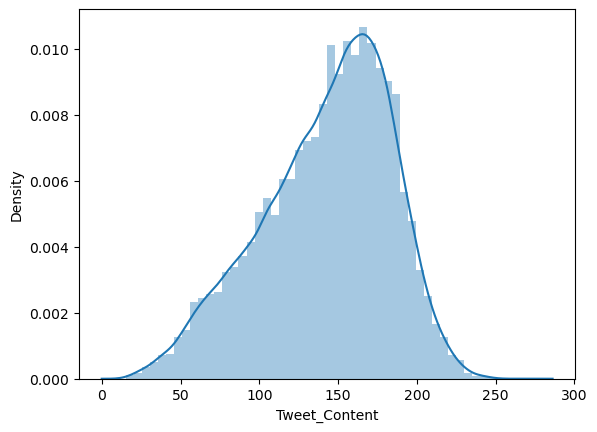

In [60]:
import seaborn as sns
text_length=preprocessed_dataset['Tweet_Content'].str.len()
sns.distplot(text_length)
plt.show()

In [61]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:20]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    fig, ax = plt.subplots(figsize=(15, 10))       
    sns.barplot(x=y,y=x, ax=ax)

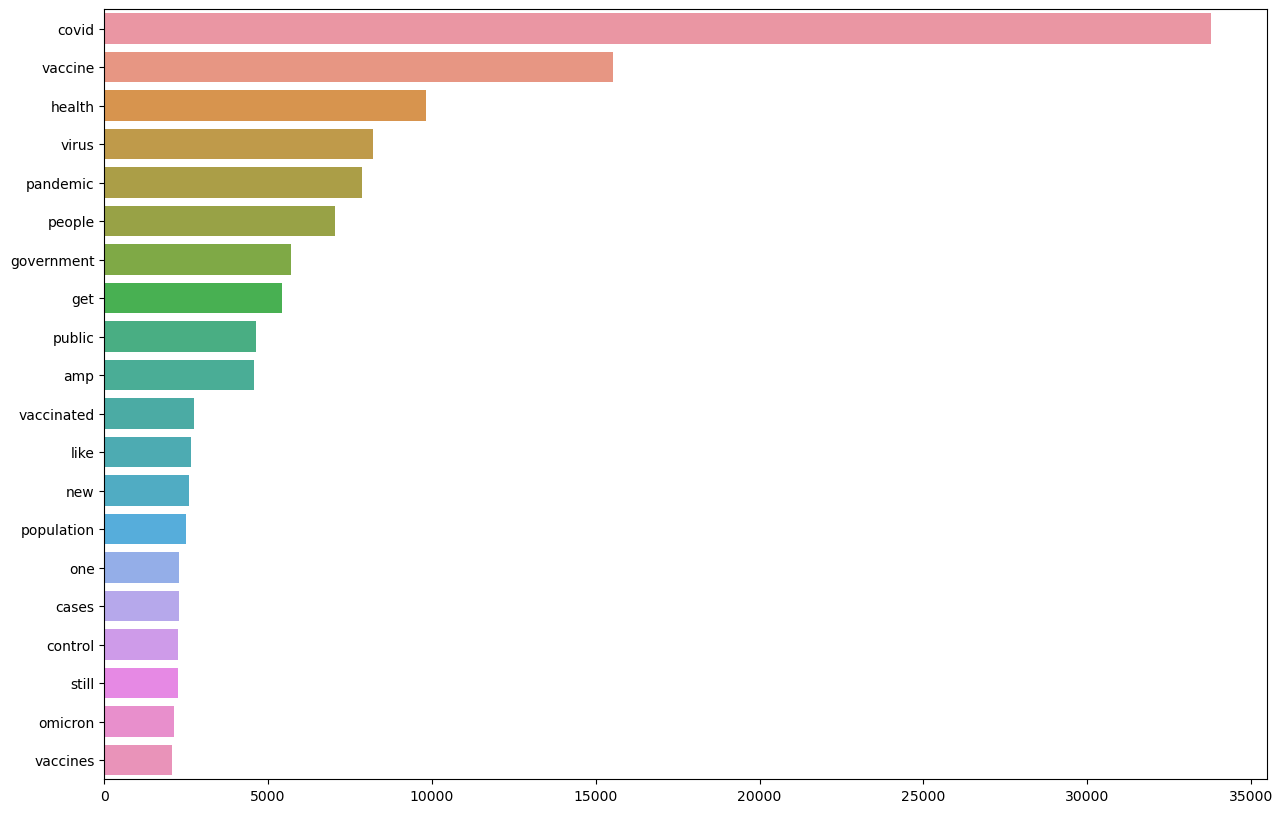

In [62]:
plot_top_non_stopwords_barchart(preprocessed_dataset['Tweet_Content'])

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturized with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Positive Data

In [67]:
from wordcloud import WordCloud
stopwords_list = stopwords.words('english')
positive_reviews = dataset[dataset['Sentiment'] == 'Positive']['Tweet_Content']
pos = ' '.join(map(str, positive_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Positive Tweet_Contents')
plt.axis('off')
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

In [66]:
negative_reviews = dataset[dataset['Sentiment'] == 'Negative']['Tweet_Content']
pos = ' '.join(map(str, negative_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Negative Tweet_Contents')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

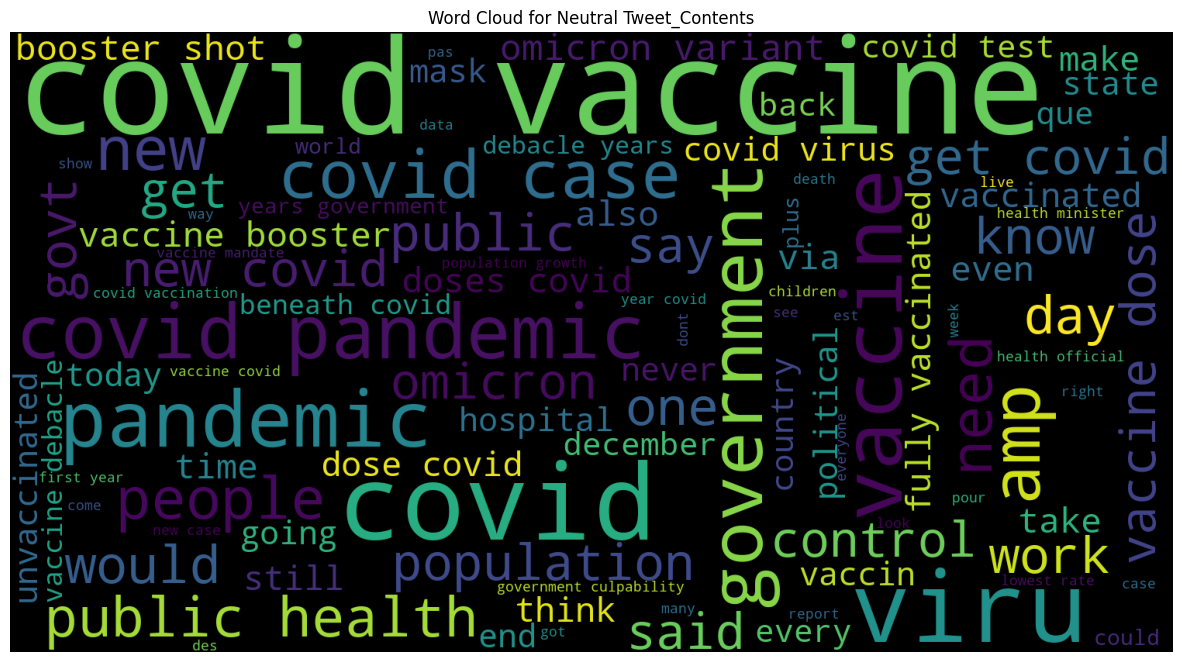

In [44]:
neutral_reviews = dataset[dataset['Sentiment'] == 'Neutral']['Tweet_Content']
pos = ' '.join(map(str, neutral_reviews))
pos_wordcloud = WordCloud(max_words=100, width=1500, height=800,
                          background_color='black',
                          stopwords=stopwords_list,
                          min_font_size=15).generate(pos)
plt.figure(figsize=(15, 15))
plt.imshow(pos_wordcloud)
plt.title('Word Cloud for Neutral Tweet_Contents')
plt.axis('off')
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [68]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_dataset['Tweet_Content'], 20)
df1 = pd.DataFrame(common_words, columns = ['Word', 'count'])
df1

Word  count
0        covid  33794
1      vaccine  15530
2       health   9808
3        virus   8191
4     pandemic   7857
5       people   7038
6   government   5701
7          get   5417
8       public   4625
9          amp   4574
10  vaccinated   2726
11        like   2632
12         new   2588
13  population   2485
14         one   2284
15       cases   2266
16     control   2236
17       still   2236
18     omicron   2124
19    vaccines   2056

Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

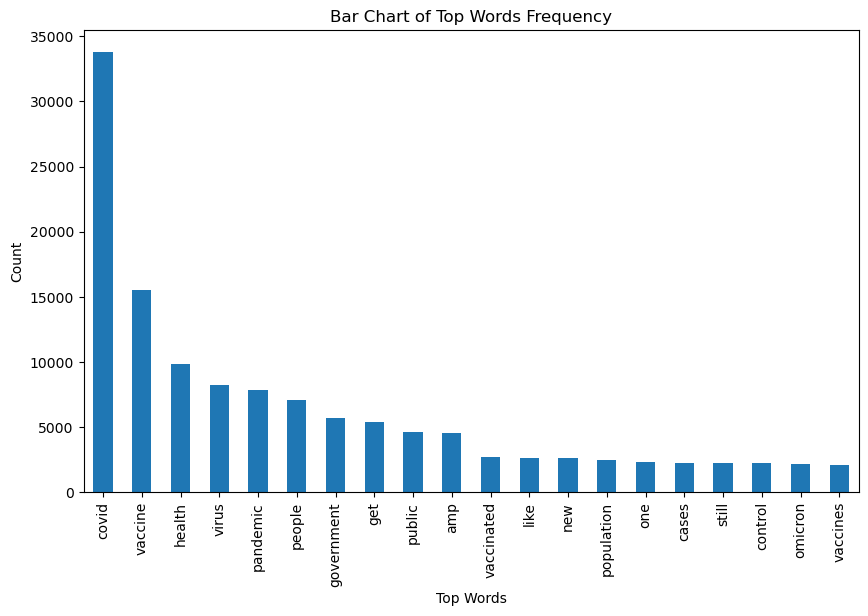

In [69]:
df1.groupby('Word').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

These are the topmost occurring words in the reviews. But instead of just seeing one word two consecutive words or three consecutive words are more helpful.

In [70]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(preprocessed_dataset['Tweet_Content'], 10)
df2 = pd.DataFrame(common_words2, columns=['Text', "Count"])
df2

Text  Count
0    covid vaccine   4254
1   covid pandemic   1849
2    public health   1620
3        get covid   1015
4      covid cases    942
5      covid virus    691
6      health care    662
7    getting covid    604
8  omicron variant    572
9    mental health    568

<Axes: title={'center': 'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

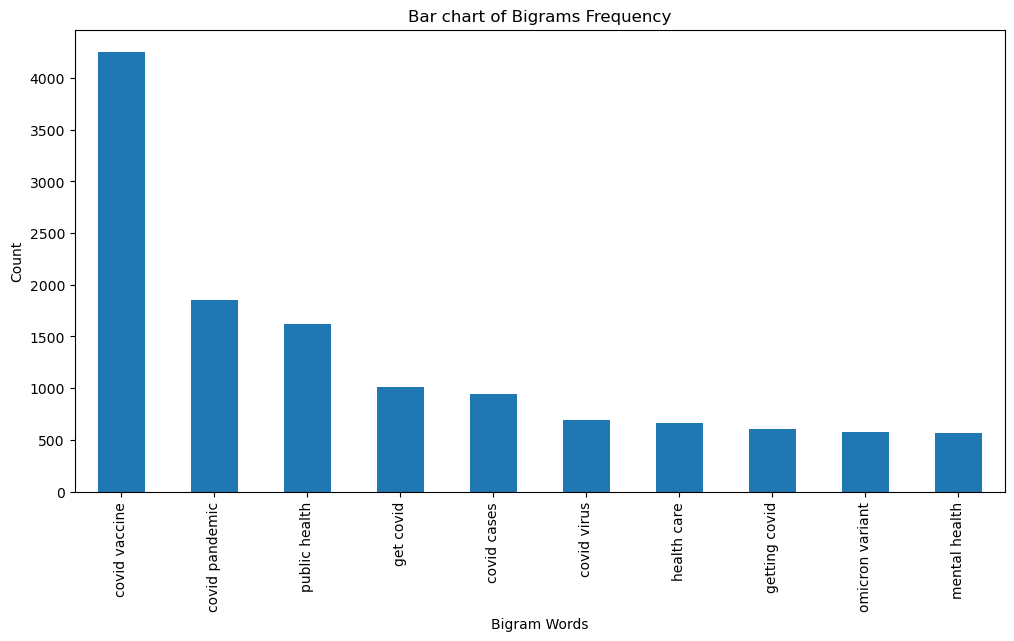

In [71]:
df2.groupby('Text').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)


<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature ExtractionMethod 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [72]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_dataset['Tweet_Content']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


In [73]:
# Save the fitted vectorizer to a file
vectorizer_filename = 'trained_count_vectorizer.pkl'
with open(vectorizer_filename, 'wb') as f:
    pickle.dump(count_vectorizer, f)

## Convert Input of Training Data into Feature Vectors

In [74]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



abandoned  abbott  abc  ability  able  abroad  absences  absent  absolute  \
0          0       0    0        0     0       0         0       0         0   
1          0       0    0        0     0       0         0       0         0   
2          0       0    0        0     0       0         0       0         0   
3          0       0    0        0     0       0         0       0         0   
4          0       0    0        0     0       0         0       0         0   

   absolutely  ...  youth  youtube  youve  yrs  yrswalter  yup  zealand  zero  \
0           0  ...      0        0      0    0          0    0        0     0   
1           0  ...      0        0      0    0          0    0        0     0   
2           0  ...      0        0      0    0          0    0        0     0   
3           0  ...      0        0      0    0          0    0        0     0   
4           0  ...      0        0      0    0          0    0        0     0   

   zinc  zone  
0     0     0  
1     0     0  
2     0     0  
3     0     0  
4     0     0  

[5 rows x 5000 columns]

# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [75]:
''' 
    /*------------- SPLITTING_dataset_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

dataset_output = pd.DataFrame(preprocessed_dataset["Sentiment"])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
dataset_output.head()


Output of Training Data:



Sentiment
0   Neutral
1  Positive
2  Negative
3  Negative
4  Negative

In [76]:
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Sentiment' column
dataset_output['Sentiment'] = label_encoder.fit_transform(dataset_output['Sentiment'])

In [54]:
dataset_output

Sentiment
0              1
1              0
2              0
3              2
4              0
...          ...
49991          0
49992          1
49993          2
49994          0
49995          0

[49948 rows x 1 columns]

In [77]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

## Random Forest Classifier

In [78]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Logistic Regression Classifier

In [79]:
from sklearn.linear_model import LogisticRegression
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


/Users/apple/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



## Linear SVC Classifier

In [58]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [59]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [60]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [61]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.72


Precision Score of Random Forest Classifier:

0.72


Recall Score of Random Forest Classifier:

0.72


F1 Score of Random Forest Classifier:

0.72


In [62]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4329
           1       0.62      0.67      0.65      1221
           2       0.75      0.71      0.73      4440

    accuracy                           0.72      9990
   macro avg       0.69      0.71      0.70      9990
weighted avg       0.72      0.72      0.72      9990



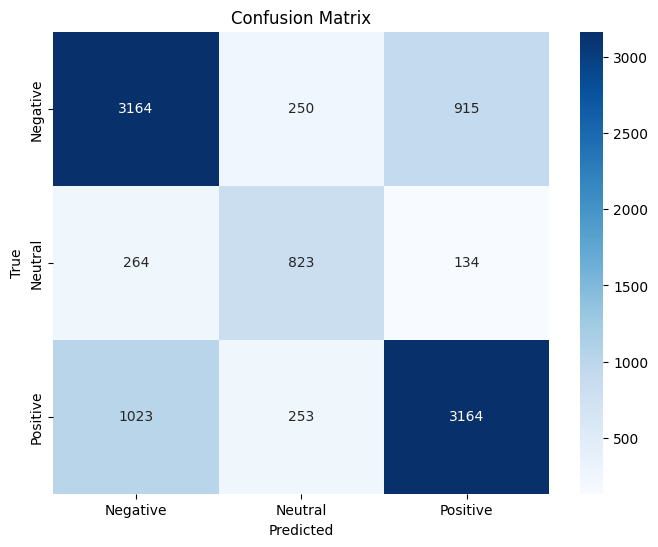

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Logistic Regression Classifier

In [64]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.85

precision Score of LR_claasifier:

0.85


Recall Score of LR_claasifier:

0.85


F1 Score of LR_claasifier:

0.85


In [65]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4329
           1       0.79      0.81      0.80      1221
           2       0.86      0.86      0.86      4440

    accuracy                           0.85      9990
   macro avg       0.84      0.84      0.84      9990
weighted avg       0.85      0.85      0.85      9990



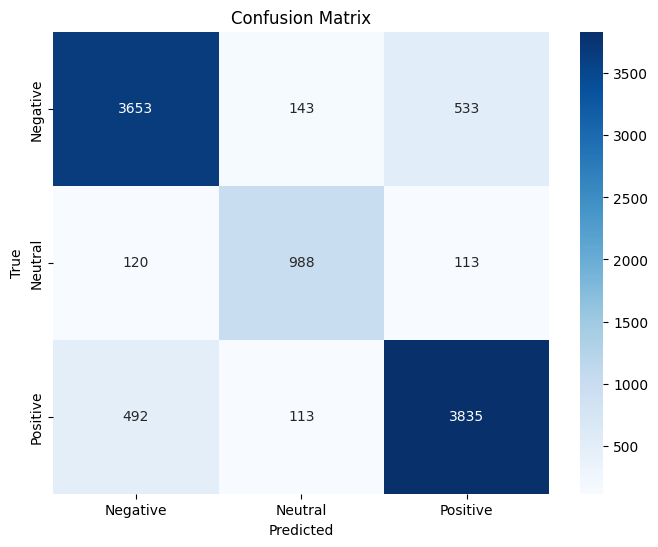

In [66]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## BernoulliNB

In [67]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.74


Precision Score of BernoulliNB:

0.74


Recall Score of BernoulliNB:

0.74


F1 Score of BernoulliNB:

0.74


In [68]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      4329
           1       0.60      0.70      0.65      1221
           2       0.79      0.71      0.75      4440

    accuracy                           0.74      9990
   macro avg       0.71      0.73      0.72      9990
weighted avg       0.74      0.74      0.74      9990



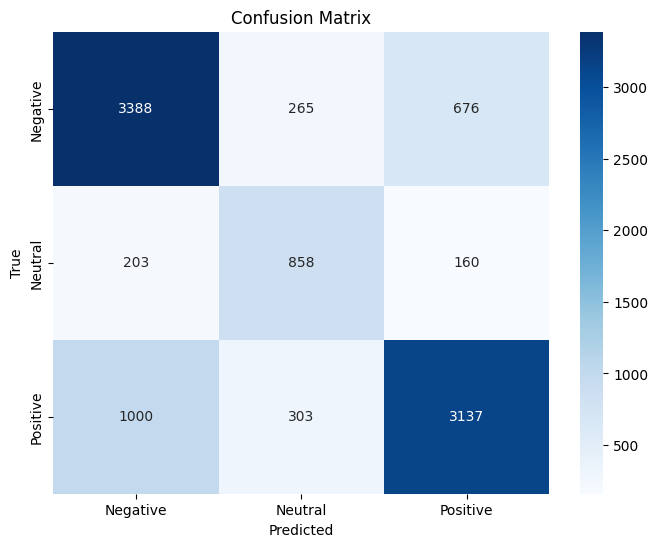

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Linear SVC

In [70]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.84

precision Score of LinearSVC:

0.84


Recall Score of LinearSVC:

0.84


F1 Score of LinearSVC:

0.84


In [71]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4329
           1       0.78      0.79      0.79      1221
           2       0.85      0.86      0.85      4440

    accuracy                           0.84      9990
   macro avg       0.83      0.83      0.83      9990
weighted avg       0.84      0.84      0.84      9990



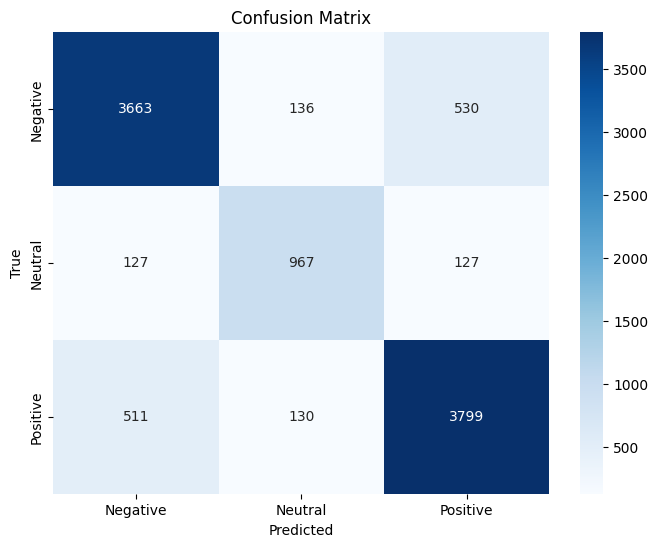

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [73]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.73

precision Score of MultinomialNB:

0.74


Recall Score of MultinomialNB:

0.73


F1 Score of MultinomialNB:

0.73


In [74]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      4329
           1       0.59      0.60      0.60      1221
           2       0.78      0.72      0.75      4440

    accuracy                           0.73      9990
   macro avg       0.70      0.70      0.70      9990
weighted avg       0.74      0.73      0.73      9990



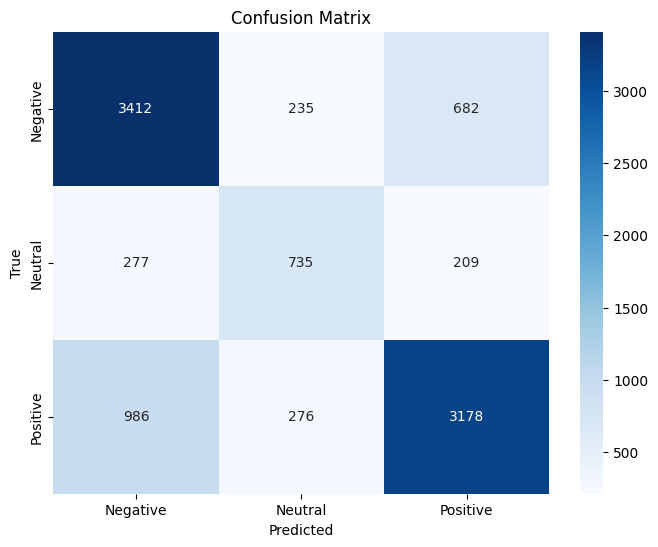

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Selection of Best Model

In [76]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.72   |    0.72   |  0.72  |   0.72   |
| Logistic Regression Classifier |   0.85   |    0.85   |  0.85  |   0.85   |
|     Bernoulli Naive Bayes      |   0.74   |    0.74   |  0.74  |   0.74   |
|           Linear SVC           |   0.84   |    0.84   |  0.84  |   0.84   |
|    Multinomial Naive Bayes     |   0.73   |    0.74   |  0.73  |   0.73   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | f1_score |
+--------------------------------+----------+-----------+--------+----------+
| Logi

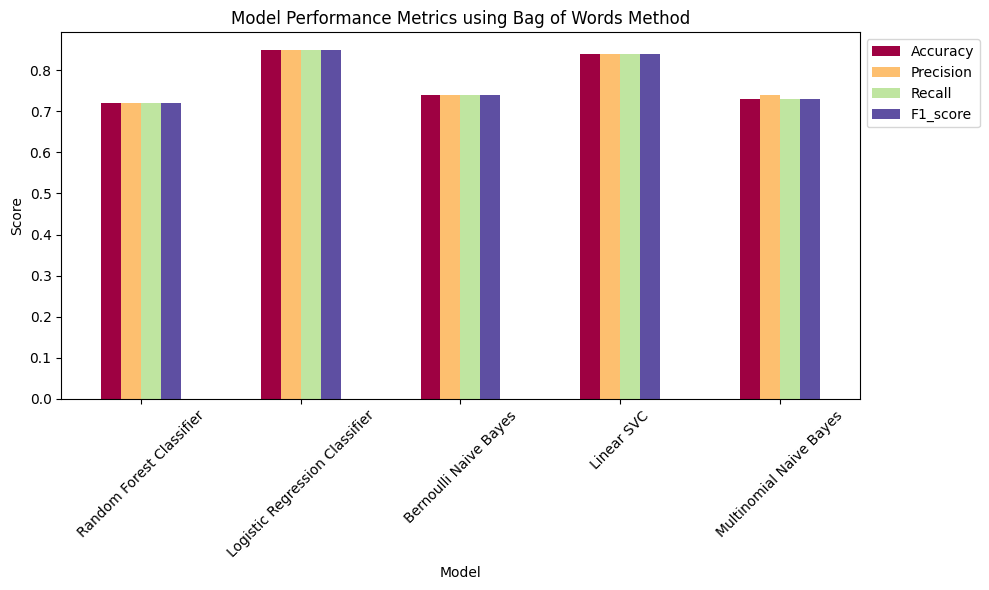

In [77]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using Bag of Words Method')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [78]:
filename = 'updatedTrainedModel.sav'
pickle.dump(random_forest_classifier, open(filename, 'wb'))

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Feature Extraction Method 2:Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)</b></div>

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [79]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,2),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 3000 Features 
train_text = preprocessed_dataset['Tweet_Content']

# Fit the Tfidf Vectorizer on Input Text of Training Data
tfidf_vectorizer = tfidf_vectorizer.fit(train_text)


In [80]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = tfidf_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = tfidf_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



abandoned  abc  ability  able  able get  able take  absolute  absolutely  \
0        0.0  0.0      0.0   0.0       0.0        0.0       0.0         0.0   
1        0.0  0.0      0.0   0.0       0.0        0.0       0.0         0.0   
2        0.0  0.0      0.0   0.0       0.0        0.0       0.0         0.0   
3        0.0  0.0      0.0   0.0       0.0        0.0       0.0         0.0   
4        0.0  0.0      0.0   0.0       0.0        0.0       0.0         0.0   

   absurd  abt  ...  young people  younger  youre  youth  youve  yrs  yup  \
0     0.0  0.0  ...           0.0      0.0    0.0    0.0    0.0  0.0  0.0   
1     0.0  0.0  ...           0.0      0.0    0.0    0.0    0.0  0.0  0.0   
2     0.0  0.0  ...           0.0      0.0    0.0    0.0    0.0  0.0  0.0   
3     0.0  0.0  ...           0.0      0.0    0.0    0.0    0.0  0.0  0.0   
4     0.0  0.0  ...           0.0      0.0    0.0    0.0    0.0  0.0  0.0   

   zealand  zero  zero covid  
0      0.0   0.0         0.0  
1      0.0   0.0         0.0  
2      0.0   0.0         0.0  
3      0.0   0.0         0.0  
4      0.0   0.0         0.0  

[5 rows x 5000 columns]

In [81]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = dataset_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [82]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [83]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)



Accuracy Score of Random Forest Classifier:

0.7


Precision Score of Random Forest Classifier:

0.69


Recall Score of Random Forest Classifier:

0.7


F1 Score of Random Forest Classifier:

0.7


In [84]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

           0       0.67      0.76      0.71      4329
           1       0.64      0.54      0.59      1221
           2       0.74      0.68      0.71      4440

    accuracy                           0.70      9990
   macro avg       0.69      0.66      0.67      9990
weighted avg       0.70      0.70      0.70      9990



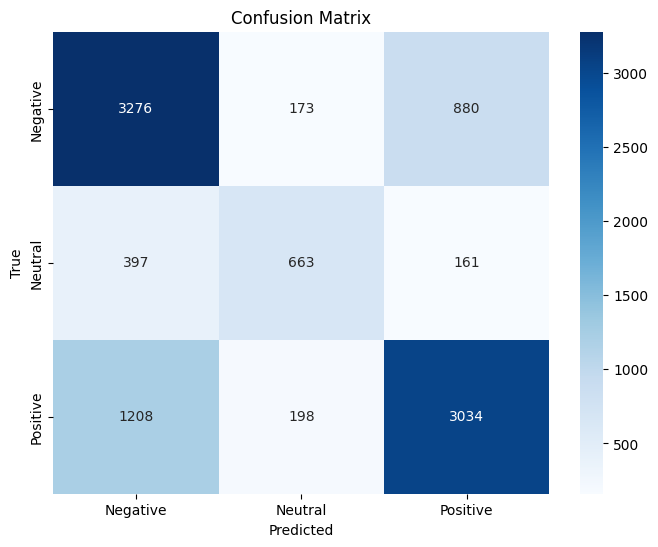

In [85]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, ran_for_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Logistic Regression Classifier

In [86]:
LR_claasifier = LogisticRegression()
LR_claasifier = LR_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(LR_claasifier)

Parameters and their values:

LogisticRegression()


In [87]:
log_reg_predict=LR_claasifier.predict(X_test)

print("\n\nAccuracy Score of LR_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of LR_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_pre)

print("\n\nRecall Score of LR_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of LR_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of LR_claasifier:

0.81

precision Score of LR_claasifier:

0.81


Recall Score of LR_claasifier:

0.81


F1 Score of LR_claasifier:

0.81


In [88]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4329
           1       0.80      0.60      0.68      1221
           2       0.81      0.85      0.83      4440

    accuracy                           0.81      9990
   macro avg       0.81      0.76      0.78      9990
weighted avg       0.81      0.81      0.81      9990



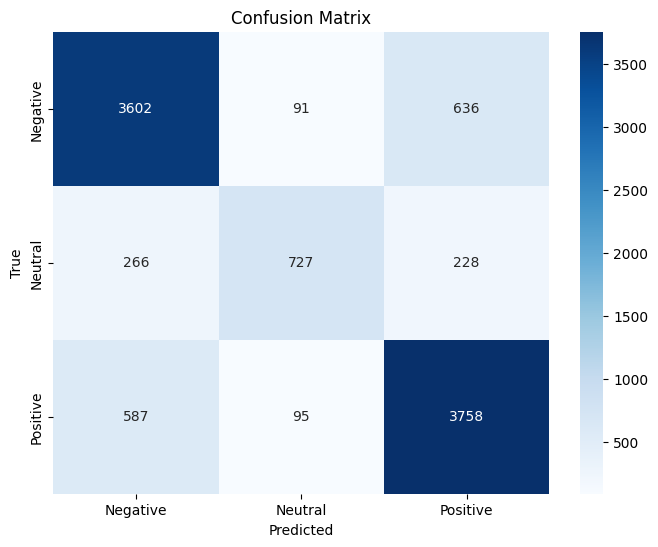

In [89]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, log_reg_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Linear SVC

In [90]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [91]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.83

precision Score of LinearSVC:

0.82


Recall Score of LinearSVC:

0.83


F1 Score of LinearSVC:

0.83


In [92]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      4329
           1       0.78      0.71      0.74      1221
           2       0.83      0.85      0.84      4440

    accuracy                           0.83      9990
   macro avg       0.82      0.80      0.81      9990
weighted avg       0.83      0.83      0.83      9990



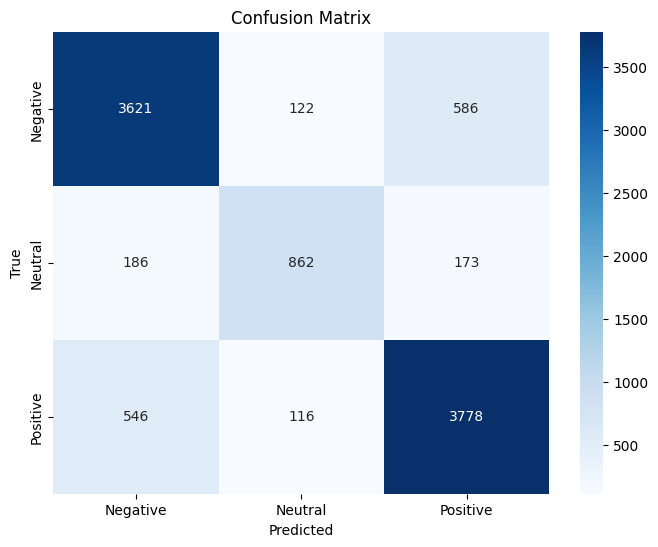

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, linear_svc_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# BernoulliNB

In [94]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [95]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.71


Precision Score of BernoulliNB:

0.68


Recall Score of BernoulliNB:

0.71


F1 Score of BernoulliNB:

0.71


In [96]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74      4329
           1       0.54      0.72      0.62      1221
           2       0.80      0.63      0.71      4440

    accuracy                           0.71      9990
   macro avg       0.68      0.71      0.69      9990
weighted avg       0.72      0.71      0.71      9990



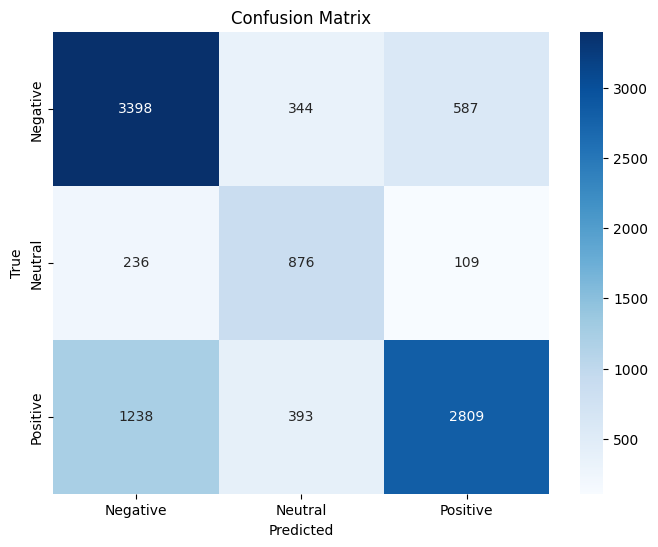

In [97]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, bernoulli_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# MultinomialNB

In [98]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [99]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.71

precision Score of MultinomialNB:

0.71


Recall Score of MultinomialNB:

0.71


F1 Score of MultinomialNB:

0.71


In [100]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      4329
           1       0.67      0.38      0.49      1221
           2       0.73      0.72      0.72      4440

    accuracy                           0.71      9990
   macro avg       0.70      0.63      0.65      9990
weighted avg       0.71      0.71      0.70      9990



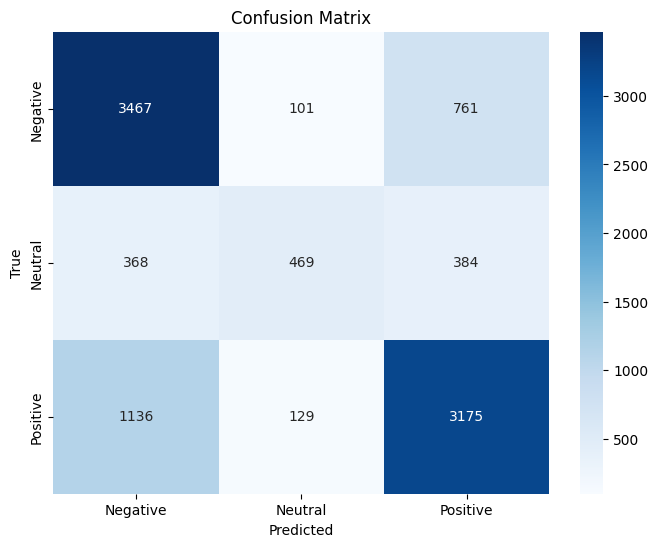

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
confusion_matrix = confusion_matrix(y_test, multi_nb_predict)
class_names = ["Negative", "Neutral", "Positive"]

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Best Results

In [102]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['Random Forest Classifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['Logistic Regression Classifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['Bernoulli Naive Bayes', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['Linear SVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['Multinomial Naive Bayes', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Logistic Regression Classifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Bernoulli Naive Bayes',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Linear SVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Multinomial Naive Bayes',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+--------------------------------+----------+-----------+--------+----------+
|             Model              | Accuracy | Precision | Recall | F1_score |
+--------------------------------+----------+-----------+--------+----------+
|    Random Forest Classifier    |   0.7    |    0.69   |  0.7   |   0.7    |
| Logistic Regression Classifier |   0.81   |    0.81   |  0.81  |   0.81   |
|     Bernoulli Naive Bayes      |   0.71   |    0.68   |  0.71  |   0.71   |
|           Linear SVC           |   0.83   |    0.82   |  0.83  |   0.83   |
|    Multinomial Naive Bayes     |   0.71   |    0.71   |  0.71  |   0.71   |
+--------------------------------+----------+-----------+--------+----------+


Best Model:

+------------+----------+-----------+--------+----------+
|   Model    | Accuracy | Precision | Recall | f1_score |
+------------+----------+-----------+--------+----------+
| Linear SVC |   0.83   |    0.82   |  0.83  |   0.83   |
+-------

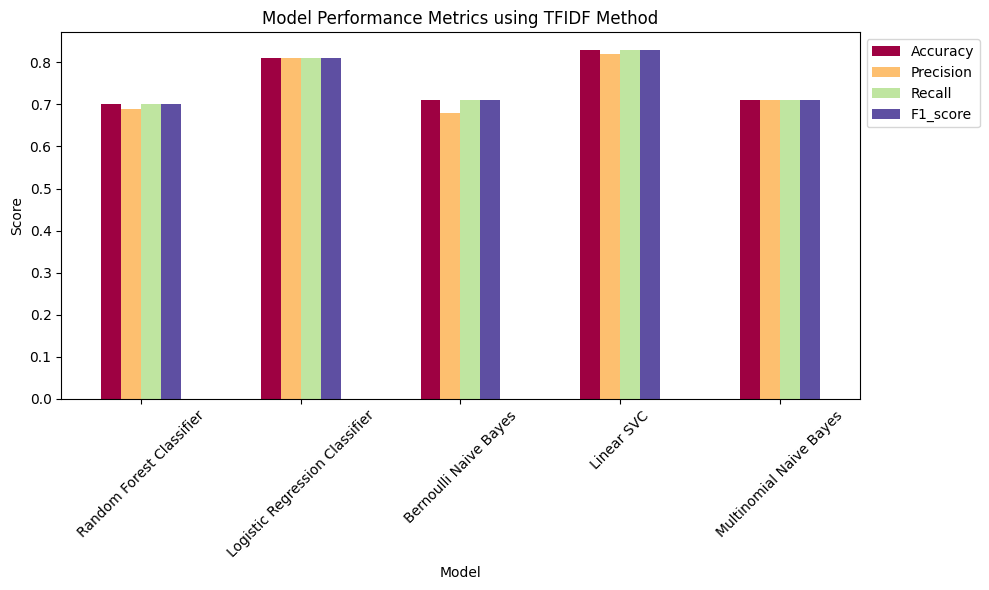

In [103]:
columns = pretty_table.field_names
data = [row for row in pretty_table.rows]
df_detailed_performance = pd.DataFrame(data, columns=columns)

import matplotlib.pyplot as plt

# Set the Model column as the index for better visualization
df_detailed_performance.set_index('Model', inplace=True)

# Plotting the bar graph
df_detailed_performance.plot(kind='bar', figsize=(10, 6), colormap='Spectral')
plt.title('Model Performance Metrics using TFIDF Method')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.ylabel('Score')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

<a id="1"></a>
# <div style="padding:20px;color:white;margin:0;font-size:24px;font-family:Georgia;text-align:Left;display:fill;border-radius:5px;background-color:#254E58;overflow:hidden"><b> Application Phase</b></div>

In [104]:
def process_text(text):
    #store user input into numpy array
    usertext = np.empty([0,0])
    usertext = np.append(usertext, text)
    #Load saved vectorizer
    #vectorizer = pickle.load(open('trainedtfidf.pkl', 'rb'))
    fitVectorizer = count_vectorizer.transform(usertext)
    fitVectorizer = fitVectorizer.todense()
    #print(vectorizer.get_feature_names())
    countVectDF = pd.DataFrame(fitVectorizer, columns=count_vectorizer.get_feature_names_out())
    #print("\n",countVectDF)
    return countVectDF

In [105]:
def load_Model(text):
    loadedLG = pickle.load(open(filename, 'rb'))
    outputPrediction = loadedLG.predict(process_text(text))
    return outputPrediction


In [106]:
def make_Prediction(text):
    if text == 0:
        emotion ="Negative"
    elif text == 1:
        emotion ="Neutral"
    elif text == 2:
        emotion ="Positive"
    return emotion

In [107]:
from tkinter import *


with open('updatedTrainedModel.sav', 'rb') as f:
    loadedLG = pickle.load(f)

In [108]:
def detect():
    user_input = input1.get("1.0","end-1c")
    answer.config(text=make_Prediction(load_Model(user_input)))

In [109]:
root = Tk()
root.title('Sentiment Analysis System')
root.geometry('530x430')
root.resizable(width=True, height=True)

topFrame = Frame(root)
topFrame.pack()
bottomFrame = Frame(root)
bottomFrame.pack(side=BOTTOM)

label11 = Label(root, text='Sentiment Analysis System ',font=("Times 24 bold"),fg='Dark Blue').place(x = 80,y = 10)


label1 = Label(root, text='Enter the Tweet_Content',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 57)
#label1.pack()

input1 = Text(root, height=6, width=40)
input1.place(x = 105,y = 90)
#input1.pack()

button1 = Button(root, text='Detect', command=detect, height=2,width=15,fg='green', bd=6,font=("Times 11 bold")).place(x = 190,y = 206)
#button1.pack()

label1 = Label(root, text='Sentiment: ',font=("Times 17 bold"),fg='Blue').place(x = 105,y = 270)
#label1.pack()

answer = Label(root, text='' ,font=("Times 18 bold"),fg='Black')
answer.place(x = 230,y = 300)
#answer.pack()

button2 = Button(root, text='Cancel', command=quit, height=2, width=15, fg='red', bd=6,font=("Times 11 bold")).place(x = 190,y = 345)
#button2.pack()
label11 = Label(root, text='Developed by: Developer',font=("Times 8"),fg='black').place(x = 95,y = 405)
root.mainloop()